In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Loading dataset
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.5)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape

# Store original dimensions
original_shape = (h, w)

# Standardizing feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
n_components = 100  # Number of principal components to keep
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Transformed shape: {X_pca.shape}")





Original shape: (1560, 2914)
Transformed shape: (1560, 100)


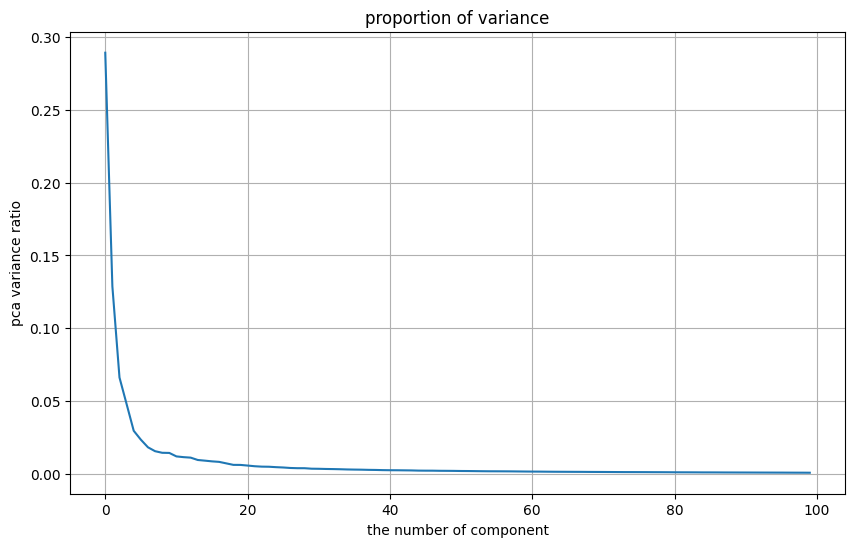

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_, linestyle='-')
plt.title('proportion of variance')
plt.xlabel('the number of component')
plt.ylabel('pca variance ratio')
plt.grid()
plt.show()

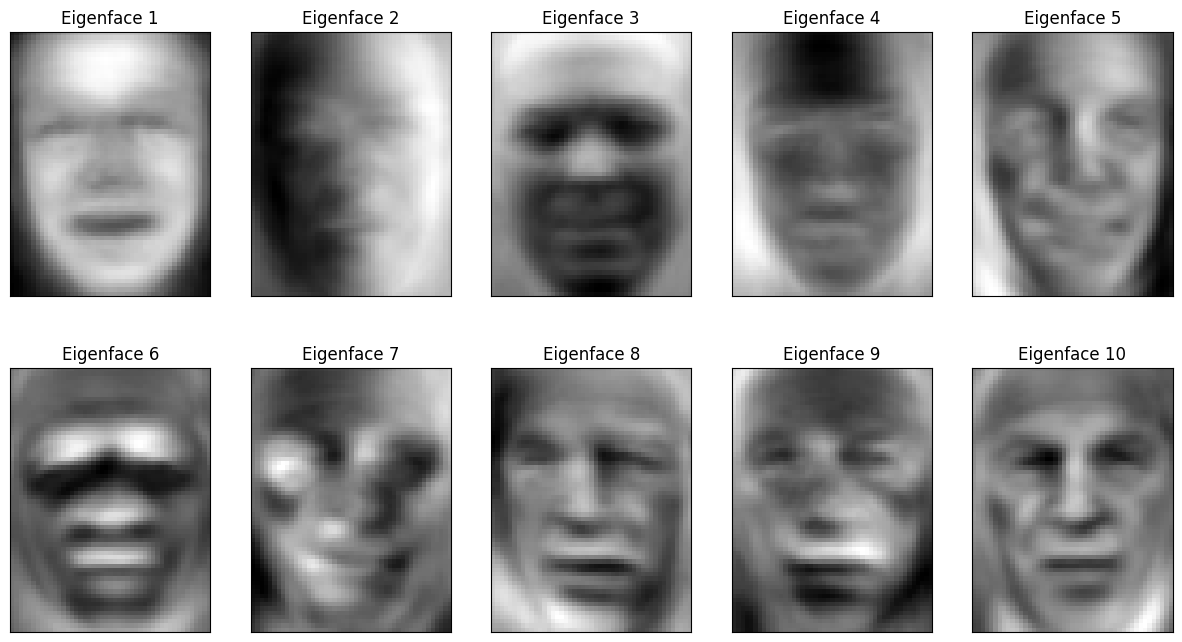

In [3]:
eigenfaces = pca.components_.reshape((n_components, h, w))

plt.figure(figsize=(15, 8))
for i in range(10): # displaying the first 10 eigenfaces
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"Eigenface {i+1}")
    plt.xticks(())
    plt.yticks(())
plt.show()

In [4]:
# function to plot original and reconstructed faces
# used to check how well PCA captures important features

def plot_reconstructed_faces(X_original, X_reconstructed, n_faces=4):
    plt.figure(figsize=(15, 8))
    for i in range(n_faces):
        # original image
        ax = plt.subplot(2, n_faces, i + 1)
        plt.imshow(X_original[i].reshape((h, w)), cmap='gray')
        plt.xticks(())
        plt.yticks(())

        # reconstructed image
        ax = plt.subplot(2, n_faces, i + 1 + n_faces)
        plt.imshow(X_reconstructed[i].reshape((h, w)), cmap='gray')
        plt.xticks(())
        plt.yticks(())

    plt.show()

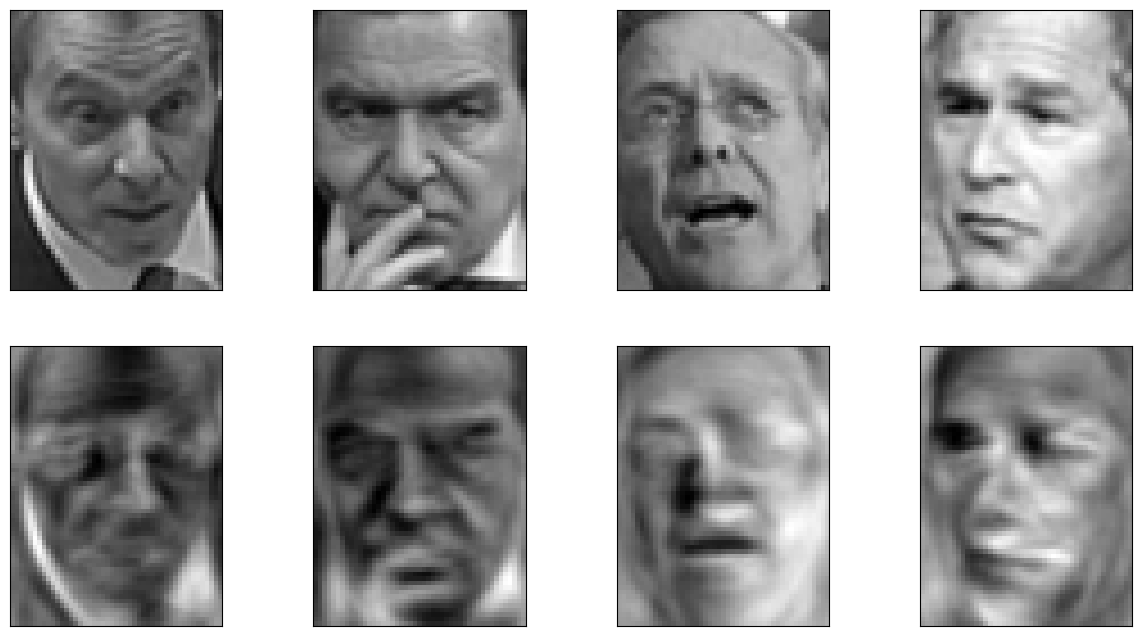

In [5]:
X_reconstructed = pca.inverse_transform(X_pca)
plot_reconstructed_faces(X, X_reconstructed)

Accuracy: 0.74


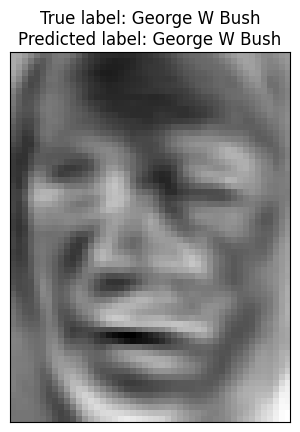

In [6]:
# Naive Bayes Classifier implementation
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}
        
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)
            self.prior[c] = X_c.shape[0] / X.shape[0]
    
    def _calculate_probability(self, mean, var, x):
        exponent = np.exp(-(x - mean) ** 2 / (2 * var))
        return exponent / np.sqrt(2 * np.pi * var)
    
    def _calculate_posterior(self, x):
        posteriors = []
        
        for c in self.classes:
            prior = np.log(self.prior[c])
            likelihood = np.sum(np.log(self._calculate_probability(self.mean[c], self.var[c], x)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]
    
    def predict(self, X):
        return [self._calculate_posterior(x) for x in X]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Training the classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Predicting
predictions = nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Select one image from the test set
index = 15
single_image = X_test[index]
single_image_original = pca.inverse_transform(single_image).reshape(original_shape)

# Predict the label for the single image
predicted_label = nb.predict(np.array([single_image]))[0]
true_label = y_test[index]

# Visualize the image and print the prediction
plt.imshow(single_image_original, cmap='gray')
plt.title(f"True label: {target_names[true_label]}\nPredicted label: {target_names[predicted_label]}")
plt.xticks(())
plt.yticks(())
plt.show()

In [7]:
n_samples

1560

In [8]:
lfw_people.images

array([[[0.3150327 , 0.33333334, 0.39738563, ..., 0.22352941,
         0.2784314 , 0.30588236],
        [0.3385621 , 0.34901962, 0.40392157, ..., 0.15555556,
         0.22745098, 0.3124183 ],
        [0.36078432, 0.38039216, 0.37124184, ..., 0.17254902,
         0.18431373, 0.2496732 ],
        ...,
        [0.18692811, 0.18431373, 0.1751634 , ..., 0.6640523 ,
         0.4366013 , 0.3124183 ],
        [0.18692811, 0.18954249, 0.18169935, ..., 0.58300656,
         0.54640526, 0.3895425 ],
        [0.18692811, 0.18562092, 0.18039216, ..., 0.5254902 ,
         0.606536  , 0.46535948]],

       [[0.11764706, 0.22352941, 0.31764707, ..., 0.1751634 ,
         0.16862746, 0.15555556],
        [0.14771242, 0.26797387, 0.34117648, ..., 0.22091503,
         0.20915033, 0.1882353 ],
        [0.17254902, 0.29150328, 0.34640524, ..., 0.25882354,
         0.2379085 , 0.21176471],
        ...,
        [0.03137255, 0.1124183 , 0.4261438 , ..., 0.76862746,
         0.7385621 , 0.7176471 ],
        [0.0

In [9]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [10]:
df=pd.DataFrame(lfw_people.target_names)

In [11]:
target_names[6]

np.str_('Jacques Chirac')

In [12]:
lfw_people

{'data': array([[0.3150327 , 0.33333334, 0.39738563, ..., 0.5254902 , 0.606536  ,
         0.46535948],
        [0.11764706, 0.22352941, 0.31764707, ..., 0.303268  , 0.40784314,
         0.52026147],
        [0.3633987 , 0.2535948 , 0.19738562, ..., 0.5189543 , 0.17908497,
         0.3124183 ],
        ...,
        [0.19346406, 0.21045752, 0.29150328, ..., 0.6875817 , 0.6575164 ,
         0.5908497 ],
        [0.5084967 , 0.6       , 0.654902  , ..., 0.9019608 , 0.88366014,
         0.8901961 ],
        [0.12418301, 0.09673203, 0.10849673, ..., 0.12941177, 0.16209151,
         0.29150328]], shape=(1560, 2914), dtype=float32),
 'images': array([[[0.3150327 , 0.33333334, 0.39738563, ..., 0.22352941,
          0.2784314 , 0.30588236],
         [0.3385621 , 0.34901962, 0.40392157, ..., 0.15555556,
          0.22745098, 0.3124183 ],
         [0.36078432, 0.38039216, 0.37124184, ..., 0.17254902,
          0.18431373, 0.2496732 ],
         ...,
         [0.18692811, 0.18431373, 0.1751634 , ..

In [13]:
list(lfw_people.target[:10])

[np.int64(11),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(3)]

In [14]:
lfw_people.target_names[0]

np.str_('Ariel Sharon')

In [15]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [16]:
lfw_people.target.shape

(1560,)

In [17]:
df = pd.DataFrame({'Name': lfw_people.target_names[lfw_people.target]})

# Zliczanie liczby wystąpień każdego nazwiska
name_counts = df['Name'].value_counts()

# Wyświetlenie wyników
for name, count in name_counts.items():
    print(f'{name}: {count}')

George W Bush: 530
Colin Powell: 236
Tony Blair: 144
Donald Rumsfeld: 121
Gerhard Schroeder: 109
Ariel Sharon: 77
Hugo Chavez: 71
Junichiro Koizumi: 60
Jean Chretien: 55
John Ashcroft: 53
Serena Williams: 52
Jacques Chirac: 52


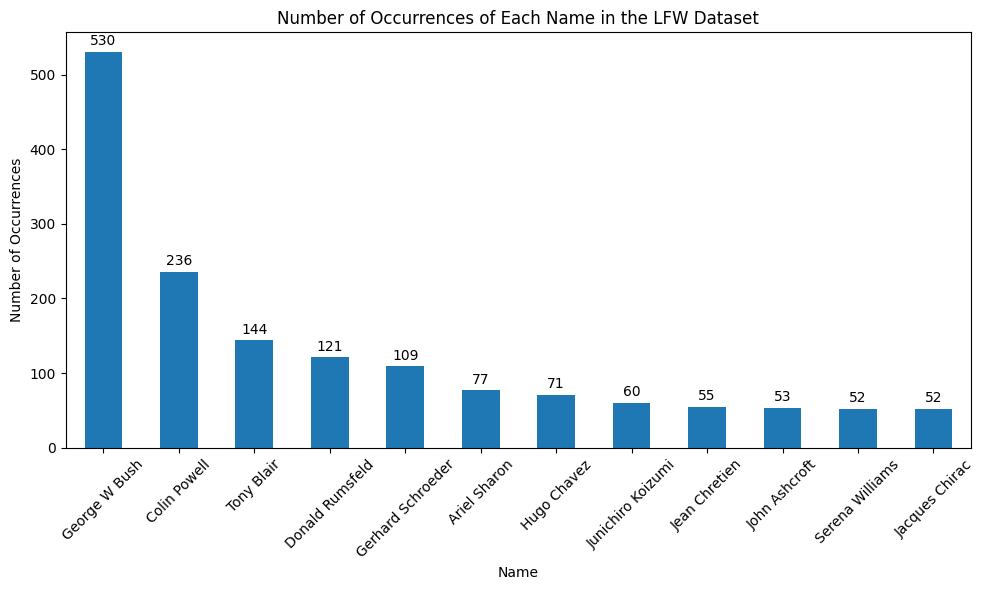

In [18]:
# Count the number of occurrences of each name
name_counts = df['Name'].value_counts()

# Display the results on a bar plot
plt.figure(figsize=(10, 6))
ax = name_counts.plot(kind='bar')
plt.title('Number of Occurrences of Each Name in the LFW Dataset')
plt.xlabel('Name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()

# Add text annotations to the bars
for i, count in enumerate(name_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()

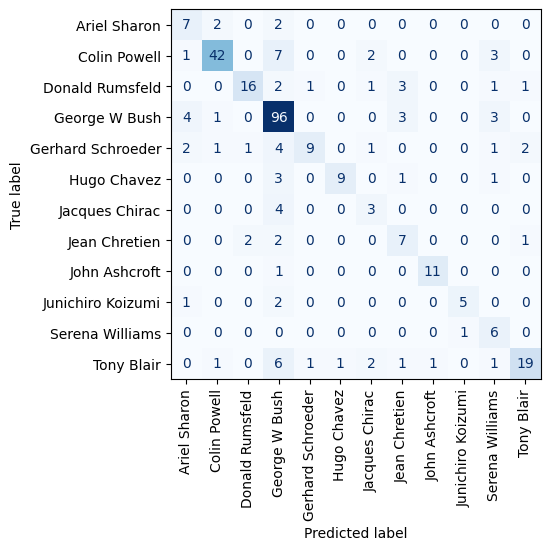

In [19]:
cm = confusion_matrix(y_test, predictions, labels=np.arange(len(target_names)))
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
display.plot(cmap='Blues', colorbar=False, xticks_rotation='vertical')
plt.show()

In [20]:
print(classification_report(y_test, predictions, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.64      0.54        11
     Colin Powell       0.89      0.76      0.82        55
  Donald Rumsfeld       0.84      0.64      0.73        25
    George W Bush       0.74      0.90      0.81       107
Gerhard Schroeder       0.82      0.43      0.56        21
      Hugo Chavez       0.90      0.64      0.75        14
   Jacques Chirac       0.33      0.43      0.38         7
    Jean Chretien       0.47      0.58      0.52        12
    John Ashcroft       0.92      0.92      0.92        12
Junichiro Koizumi       0.83      0.62      0.71         8
  Serena Williams       0.38      0.86      0.52         7
       Tony Blair       0.83      0.58      0.68        33

         accuracy                           0.74       312
        macro avg       0.70      0.67      0.66       312
     weighted avg       0.77      0.74      0.74       312

